# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

Импортируем необходимые библиотеки и модули

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_spd_matrix
from numpy.linalg import inv, cond
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Загрузим данные

In [5]:
df = pd.read_csv('/datasets/insurance.csv')

Посмотрим на первые 10 строк таблицы

In [6]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Изучим общую информацию о таблице

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Оценим выбросы при помощи построения боксплотов

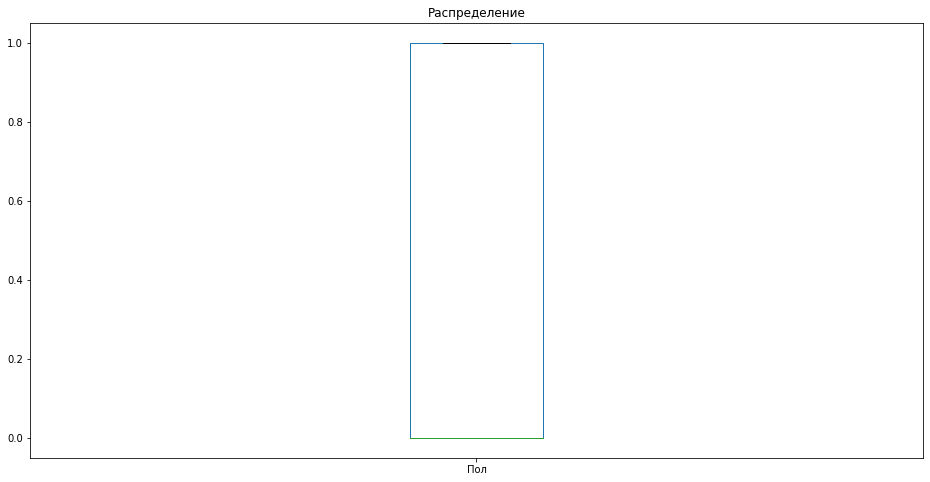

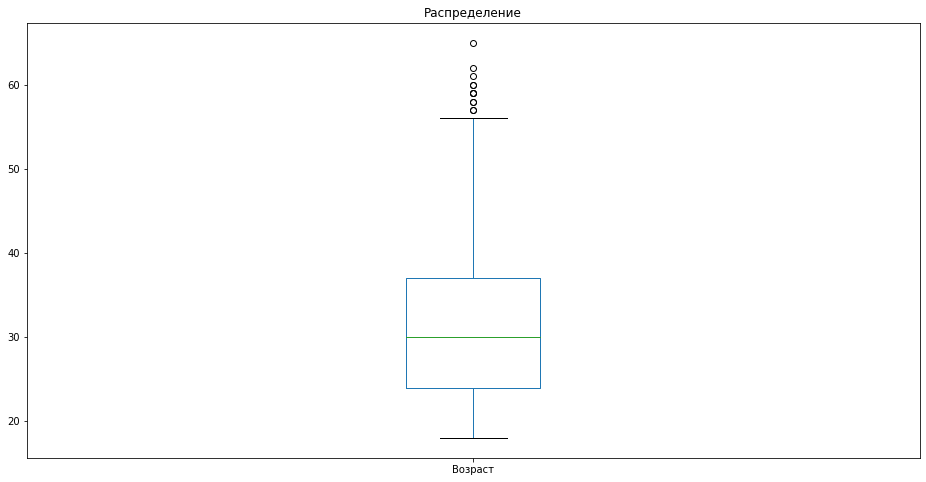

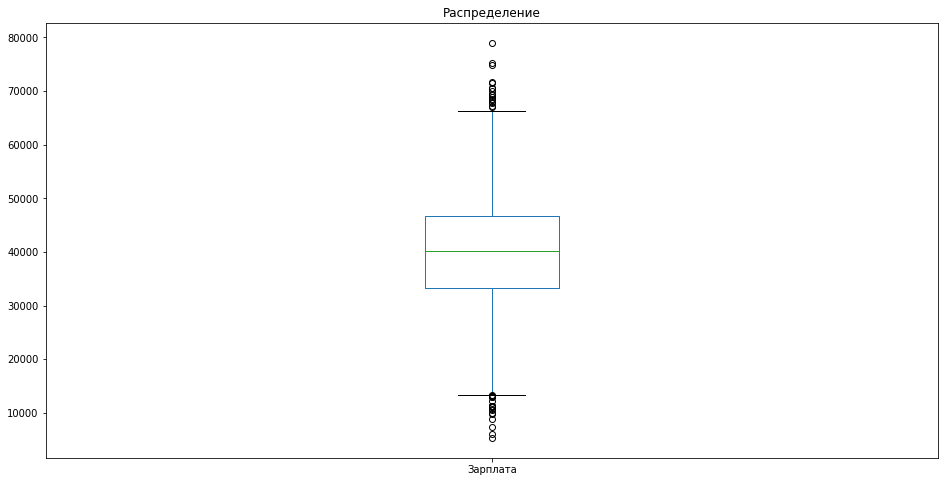

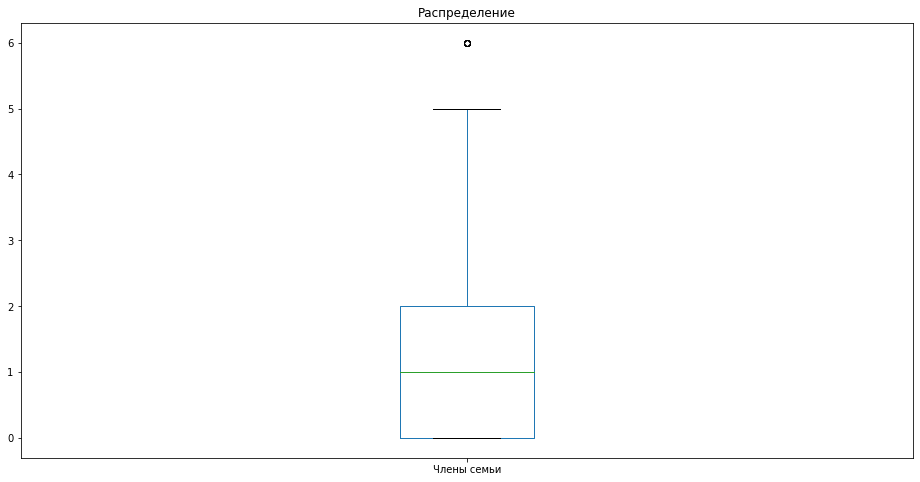

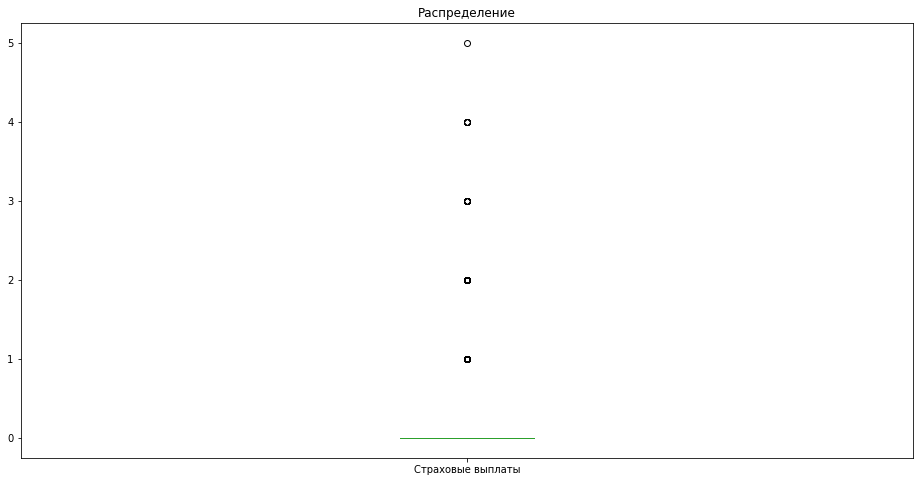

In [8]:
for i in df.columns:
    fig, ax = plt.subplots(1)
    ax.set_title('Распределение')
    df[i].plot(kind='box', figsize=(16,8), ax=ax)

Переименуем столбцы для удобства

In [9]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [10]:
df

,gender,age,salary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


И разделим данные на признаки и целевой признак

In [11]:
features = df.drop(columns='insurance_payments')
target = df['insurance_payments']

<div style="border:solid blue 2px; padding: 20px">

**Выводы**

На данном этапе мы провели первичный осмотр датафрейма. 
 * Пропусков обнаружено не было
 * Явных и неправдоподобных аномалий не встретилось
 * Столбцы датафрейма были для удобства переименованы
 * Датафрейм был разбит на два: с целевым признаком и с остальными признаками

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Качество линейной регрессии не изменится

**Обоснование:** реализовано ниже математически

Запишем в формулах.

Нам нужно доказать, что если $$
a_1 = X_1w_1,
$$
а $$
X_1 = XP,
$$
то
$$
a_1 = a
$$
Воспользуемся последовательно следующими свойствами:
$$
1. (AB)^T = B^TA^T
$$
$$
2. (AB)^{-1} = B^{-1}A^{-1}
$$
$$
3. AA^{-1} = E
$$
Подставим в формулу для предсказания написанные ранее выражения и получим
$$
a_1 = XP((XP)^T XP)^{-1} (XP)^T y = XP(P^TX^T XP)^{-1} P^TX^T y = XPP^{-1}(X^T X)^{-1}(P^T)^{-1} P^TX^T y = X(X^TX)^{-1}X^T y = Xw = a
$$

Проверим данную гипотезу в коде.

Если мы умножим матрицу на обратимую матрицу, мы получим исходную матрицу

In [12]:
np.random.seed(42)
check_list = []
for i in range(1000):
    P = np.random.normal(1, 100, size=(4,4)).astype('int64')
    A = np.random.normal(100, 1000, size=(4,4)).astype('int64')
    check_list.append(np.linalg.det(np.rint(A @ P @ np.linalg.inv(P)).astype('int64') == A))
print(P)
print()
print(A)   

[[   0 -126 -254  -51]
 [-155   18   18  -96]
 [ -52  177   78  -44]
 [ 230 -118  -80  -10]]

[[-1431  1890   283  -689]
 [  547   246  -204 -1108]
 [-1336  2286 -1252  1797]
 [ -744   890   565   765]]


Выведем все ненулевые значения

In [13]:
for number in check_list:
    if number != 0.0:
        print(number)

Итого, ненулевых значений нет

<div style="border:solid blue 2px; padding: 20px">

**Выводы**
    
На данном этапе математически было доказано, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменится

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.


**Алгоритм**

* Создаём случайную матрицу P
* Проверяем, что она обратима
* Умножаем матрицу признаков на матрицу P
* Ищем метрики качества для исходных и для сгенерированных данных

Если нужно вернуться к исходной матрице, то
* Умножаем получившуюся матрицу на матрицу, обратную к P

**Обоснование**

На предыдущем этапе было доказано, что качество линейной регрессии при умножении матрицы признаков на любую обратимую матрицу не изменится.


## Проверка алгоритма

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


Создадим матрицу фичей

In [14]:
features_matrix = features.values
features_matrix

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Реализуем функцию построения случайной обратимой матрицы

In [15]:
def generate_rand_m():
    '''
    Функция строит случайную обратимую матрицу размером 4*4.
    Она проверяет матрицу на обратимость. В случае, если матрица получилась не обратимой, функция вызывается ещё раз.
    '''
    try:
        random_matrix = make_spd_matrix(n_dim=4, random_state=42)
       # проверка матрицы на обратимость
        np.linalg.inv(random_matrix)
    except np.linalg.LinAlgError:
        generate_rand_m()
    return random_matrix

При помощи реализованной функции сгенерируем случайную матрицу.

In [16]:
random_matrix = generate_rand_m()
display(random_matrix)

array([[ 0.88065259, -0.84331715,  0.46713388, -0.92155001],
       [-0.84331715,  1.78069453, -0.76848207,  1.47728411],
       [ 0.46713388, -0.76848207,  0.87518709, -0.96574456],
       [-0.92155001,  1.47728411, -0.96574456,  2.01563863]])

Умножим наши матрицы

In [17]:
transformed_matrix = features_matrix @ random_matrix
features_transformed = list(transformed_matrix)

Разделим данные на обучающую и тестовую выборки

In [18]:
features_train, features_test, target_train, target_test = \
 train_test_split(features, target, test_size=0.25, random_state=42)

Возьмём модель линейной регрессии

In [19]:
model = LinearRegression()

Обучим модель на тренировочной выборке и выведем получившийся r2

In [20]:
model.fit(features_train, target_train)
predicted = model.predict(features_test)
print("R2 исходного набора данных:", r2_score(target_test, predicted))

R2 исходного набора данных: 0.4254778540696319


Аналогичные операции выполним для преобразованных данных

In [21]:
features_train_transformed, features_test_transformed = train_test_split(features_transformed, test_size=0.25, random_state=42)

In [22]:
model.fit(features_train_transformed, target_train)
predicted_transformed = model.predict(features_test_transformed)
print("R2 преобразованного набора данных:", r2_score(target_test, predicted_transformed))

R2 преобразованного набора данных: 0.4254778540701445


Получим финальную матрицу

In [23]:
final_matrix = transformed_matrix.dot(inv(random_matrix))

Проверим, что при округлении получившиеся матрицы не различаются при помощи счётчика с.

In [24]:
check_m = np.round(final_matrix[i]) == np.round(features_matrix[i])
c = 0
for m in check_m:
    if m != True:
        c += 1
if c > 0:
    print("Матрицы различаются")
else:
    print("Матрицы не различаются")

Матрицы не различаются


<div style="border:solid blue 2px; padding: 20px">

**Выводы**

Итак, мы реализовали алгоритм защиты данных, при использовании которого качество линейной регрессии практически не меняется